In [17]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import G23
from dust_extinction.parameter_averages import F19
from dust_extinction.parameter_averages import F99
from dust_extinction.parameter_averages  import CCM89
from dust_extinction.parameter_averages import D22
import sncosmo
import pandas as pd
from bayesn import SEDmodel

##Second program
import extinction

In [18]:
# wavelengths and spectrum are 1D arrays
# wavelengths between 1000 and 30000 A
wavelengths = np.logspace(np.log10(0.1), np.log10(10), num=1000)*u.micron
#wavelengths2 = np.logspace(np.log10(0.3), np.log10(3.0), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

In [19]:
RV_All = 3.1
extG23 = G23(Rv=RV_All)
extF19 = F19(Rv=RV_All)
extF99 = F99(Rv=RV_All)
extCCM89 = CCM89(Rv=RV_All)
extD22 = D22(Rv=RV_All)


ValueError: Input x outside of range defined for CCM89 [0.3 <= x <= 10.0, x has units 1/micron]

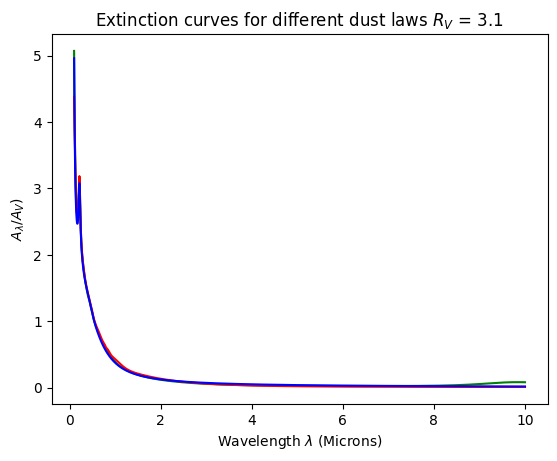

In [20]:
plt.xlabel(rf'Wavelength $\lambda$ (Microns)')
plt.ylabel(rf'$A_\lambda$/$A_V$)')
plt.title(rf'Extinction curves for different dust laws $R_V$ = '+str(RV_All))
plt.plot(wavelengths, extG23(wavelengths), 'g', label = rf"G23")
plt.plot(wavelengths, extF19(wavelengths), 'r', label = rf"F19")
plt.plot(wavelengths, extF99(wavelengths),  'b', label = rf"F99")
plt.plot(wavelengths, extCCM89(wavelengths),  'm', label = rf"CCM89")
plt.plot(wavelengths, extD22(wavelengths),  'c', label = rf"D22")
x_1 = np.linspace(0, 20, 1000)
#plt.plot(x_1-x_1+0.5,x_1, 'y')
#plt.plot(x_1-x_1+0.7,x_1, 'y', label = "V band region 0.5-0.7 microns")
plt.ylim(0,10)
plt.xlim(0,2)
plt.xscale("log")
plt.legend()
plt.savefig("/root/partiiiproject/ExtinctionCurvePlots/DustCurveMilkyWay.png", bbox_inches='tight') #save plot